/shared/shashmi/conda_envs/inverter/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading pipeline components...: 100%|██████████| 7/7 [00:01<00:00,  6.92it/s]


Generating image for prompt: 'An astronaut riding a green horse'


100%|██████████| 50/50 [00:19<00:00,  2.52it/s]


Image saved to: generated_images/an_astronaut_riding_a_green.png


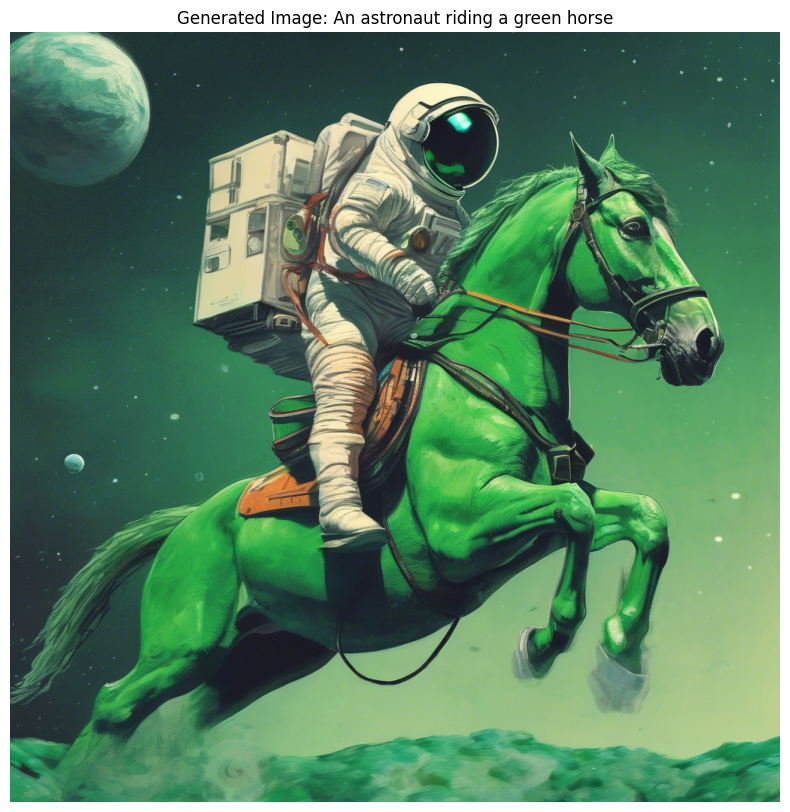

In [1]:
from diffusers import DiffusionPipeline
import torch
from PIL import Image
import matplotlib.pyplot as plt
import os

def generate_and_save_image(prompt, output_dir="generated_images"):
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Initialize the pipeline
    pipe = DiffusionPipeline.from_pretrained(
        "/shared/shashmi/stable-diffusion-xl-base-1.0",
        torch_dtype=torch.float16,
        use_safetensors=True,
        variant="fp16"
    )
    pipe.to("cuda")
    
    # Generate the image
    print(f"Generating image for prompt: '{prompt}'")
    image = pipe(prompt=prompt).images[0]
    
    # Create a filename from the prompt
    filename = "_".join(prompt.lower().split()[:5]) + ".png"
    filepath = os.path.join(output_dir, filename)
    
    # Save the image
    image.save(filepath)
    print(f"Image saved to: {filepath}")
    
    # Display the image
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Generated Image: {prompt}")
    plt.show()
    
    return filepath

# Example usage
prompt = "An astronaut riding a green horse"
generated_image_path = generate_and_save_image(prompt)